In [10]:
# Imports
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Allow Altair to make plots using more than 5000 rows
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Step 1: Describe the Dataset

This dataset first emerged in 1997 in a paper titled Sparse Spatial Autoregressions. It was collected by Pace, R. Kelley and Ronald Barry. Each row in the dataset contains details for a single block group in California. The data collected contains information about the houses for each block group and also details about the population in the city. The data was collected in 1990.

### Step 2: Load the Dataset

In [11]:
data = pd.read_csv('https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv?raw=true')

### Step 5: Wrangling (do this earlier to split training and testing data)

In [12]:
# drop rows with NA values
data = data.dropna()

# change median_income to tens of thousands of dollars
data['median_income'] = data['median_income']*10000

# move median_house_value to last column for formatting
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
           'households', 'median_income', 'ocean_proximity', 'latitude', 'longitude']
X = data[columns]
y = data['median_house_value']

# Sources:
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

In [13]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=522)

### Step 3: Explore the Dataset

In [14]:
X_train.describe(include='all')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,latitude,longitude
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346,16346.000000,16346.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,7253,NaN,NaN
mean,28.583996,2632.665423,537.742322,1424.456320,499.394837,38714.445124,NaN,35.636460,-119.573700
std,12.586127,2178.944651,422.926265,1140.457445,382.832734,18944.357707,NaN,2.137114,2.004533
min,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,NaN,32.540000,-124.300000
25%,18.000000,1454.000000,297.000000,792.000000,281.000000,25663.000000,NaN,33.930000,-121.800000
50%,29.000000,2127.000000,435.000000,1164.000000,410.000000,35348.000000,NaN,34.260000,-118.500000
75%,37.000000,3137.000000,644.000000,1720.000000,602.000000,47471.000000,NaN,37.710000,-118.010000


In [15]:

print("There are {0} records in the training portion of the dataset. Each record is a census block group.\n".format(
    X_train.count().min()))

print("The median age of houses/complexes in census blocks ranges from {0} to {1} with a mean of {2} years old and a median of {3} years old.\n".format(
    X_train['housing_median_age'].min(),
    X_train['housing_median_age'].max(),
    round(X_train['housing_median_age'].mean(), 2),
    X_train['housing_median_age'].median()))

print("The total number of rooms in a census block ranges from {0} to {1} with a mean of {2} rooms and a median of {3} rooms.\n".format(
    X_train['total_rooms'].min(),
    X_train['total_rooms'].max(),
    round(X_train['total_rooms'].mean(), 2),
    X_train['total_rooms'].median()))

print("The number of bedrooms in a census block ranges from {0} to {1} with a mean of {2} bedrooms and a median of {3} bedrooms.\n".format(
    X_train['total_bedrooms'].min(),
    X_train['total_bedrooms'].max(),
    round(X_train['total_bedrooms'].mean(), 2),
    X_train['total_bedrooms'].median()))

print("The population of a census block ranges from {0} to {1} with a mean of {2} and a median of {3}.\n".format(
    X_train['population'].min(),
    X_train['population'].max(),
    round(X_train['population'].mean(), 2),
    X_train['population'].median()))

print("The number of households in a census block ranges from {0} to {1} with a mean of {2} and a median of {3}.\n".format(
    X_train['households'].min(),
    X_train['households'].max(),
    round(X_train['households'].mean(), 2),
    data['households'].median()))

print("The median annual income in a census block ranges from ${0} to ${1} with a mean of ${2} and a median of ${3}.\n".format(
    X_train['median_income'].min(),
    X_train['median_income'].max(),
    round(X_train['median_income'].mean(), 2),
    X_train['median_income'].median()))

print("Ocean Proximity is a categorical value with one of the values:\n\t{0}, \n\t{1} (very close to the ocean), \n\t{2}, \n\t{3}, \n\t{4}.\n".format(
    X_train['ocean_proximity'].unique()[0].lower(),
    X_train['ocean_proximity'].unique()[1].lower(),
    X_train['ocean_proximity'].unique()[2].lower(),
    X_train['ocean_proximity'].unique()[3].lower(),
    X_train['ocean_proximity'].unique()[4].lower()))

print("The median house value in a census block ranges from ${0} to ${1} with a mean of ${2} and a median of ${3}.\n".format(
    y_train.min(),
    y_train.max(),
    round(y_train.mean(), 2),
    y_train.median()))

There are 16346 records in the training portion of the dataset. Each record is a census block group.

The median age of houses/complexes in census blocks ranges from 1.0 to 52.0 with a mean of 28.58 years old and a median of 29.0 years old.

The total number of rooms in a census block ranges from 2.0 to 39320.0 with a mean of 2632.67 rooms and a median of 2127.0 rooms.

The number of bedrooms in a census block ranges from 2.0 to 6445.0 with a mean of 537.74 bedrooms and a median of 435.0 bedrooms.

The population of a census block ranges from 3.0 to 35682.0 with a mean of 1424.46 and a median of 1164.0.

The number of households in a census block ranges from 2.0 to 6082.0 with a mean of 499.39 and a median of 409.0.

The median annual income in a census block ranges from $4999.0 to $150001.0 with a mean of $38714.45 and a median of $35348.0.

Ocean Proximity is a categorical value with one of the values:
	<1h ocean, 
	inland (very close to the ocean), 
	near ocean, 
	near bay, 
	island

### Step 4: Initial Thoughts

- Blocks vary drastically in the number of bedrooms and total number of rooms.
- Lowest median income blocks differ in the number of households (some highly populated blocks have very low income).
- New houses vary in their value (interesting to study the relationship between age and value).
- 7 out of the 10 lowest-value houses are INLAND. (proximity to ocean appears to heavily influence value).

### Step 6: Research Questions

Our research questions will focus on prediction factors for the median house value. Aurélien Geron completed an analysis and determined that the most effective method for estimating median house value given the features in the dataset is through linear regression. We are aiming to improve on his process and analysis by tuning hyperparameters.

### Step 7: Data Analysis and Visualizations

The following are scatterplots that model various explanatory variables against the median house value, which is the dependent variable in our project.

![Image](median-age_scatterplot.png)
![Image](median-income_scatterplot.png)
![Image](population_scatterplot.png)
![Image](households_scatterplot.png)
![Image](total-rooms_scatterplot.png)
![Image](total-bedrooms_scatterplot.png)

The plot below models total rooms and total bedrooms, and the table below shows variance inflation factors for variables.

![Image](total-rooms_total-bedrooms.png)

In [19]:
# Find Variance Inflation Factor

# drop ocean_proximity column for this
mc_data = pd.DataFrame.drop(X_train, columns=['ocean_proximity', 'longitude', 'latitude'])
mc_data['intercept'] = 1

In [20]:

# Initialize a dataframe to store Variance Inflation Factors in
mc_data.shape[1]
vif = pd.DataFrame()
vif['variable'] = mc_data.columns
vif['vif_val'] = [variance_inflation_factor(mc_data.values, i) for i in range(mc_data.shape[1])]
vif

# Sources:
# https://campus.datacamp.com/courses/generalized-linear-models-in-python/multivariable-logistic-regression?ex=4

,variable,vif_val
0,housing_median_age,1.156932
1,total_rooms,12.031079
2,total_bedrooms,35.449294
3,population,5.974685
4,households,33.344099
5,median_income,1.513296
6,intercept,17.750549


We will find and plot the correlation matrix to view correlation figures between all variables(X and y).

In [22]:
# Finding the correlation matrix
viz_data = pd.merge(X_train, y_train, left_index=True, right_index=True)
corrMatrix = viz_data.corr()
corrMatrix['names'] = corrMatrix.columns
corrMatrix = corrMatrix.melt(id_vars = 'names', value_vars = corrMatrix['names'])

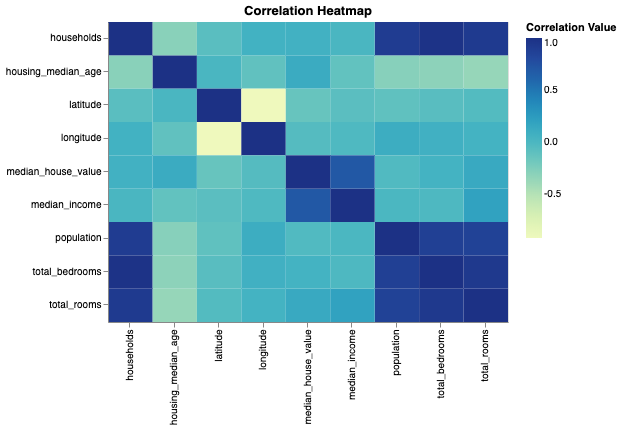

In [24]:
alt.Chart(corrMatrix).mark_rect().encode(
    x = alt.X('names:O', title = None),
    y = alt.Y('variable:O', title = None),
    color= alt.Color('value:Q', title = 'Correlation Value')
).properties(width = 400, height = 300, title = "Correlation Heatmap")

### Step 8: Summary and Conclusions

Summary is included in the Proposal section of the README.